In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import math
import geopandas as gpd
import folium
import missingno as msno
from mpl_toolkits.basemap import Basemap
import plotly.express as px 



In [192]:


df = pd.read_excel("meteor.xlsx")

In [193]:
df.head(10)

,Session,Start Date,Submitter ID,Observer ID,Submitted by,Actual Observer Name,City,Latitude,Longitude,Elevation,Unnamed: 10
0,16011,2006-01-02 18:20:00,235.0,235,Takema Hashimoto,Takema Hashimoto,Fussa-si,NaN,NaN,NaN,NaN
1,54240,2006-01-03 01:55:00,211.0,211,Michel Vandeputte,Michel Vandeputte,Ronse,50.750000,3.600000,0.0,NaN
2,41834,2006-01-03 05:00:00,82.0,82,Jurgen Rendtel,Jurgen Rendtel,Marquardt,52.459444,12.963889,0.0,NaN
3,13239,2006-01-03 10:10:00,400.0,400,William Godley,William Godley,Mounds,NaN,NaN,NaN,NaN
4,17531,2006-01-03 13:58:00,2387.0,2387,Andrey Igoshev,Andrey Igoshev,Zlatoust,55.166667,59.683333,450.0,NaN
5,16012,2006-01-03 15:30:00,235.0,235,Takema Hashimoto,Takema Hashimoto,Gotenba-si,NaN,NaN,NaN,NaN
6,53219,2006-01-03 16:33:00,85.0,85,Shigeo Uchiyama,Shigeo Uchiyama,Mt.tukuba,NaN,NaN,NaN,NaN
7,25174,2006-01-03 18:00:00,3030.0,3030,Jens Lacorne,Jens Lacorne,Le Beausset,NaN,NaN,NaN,NaN
8,30909,2006-01-03 18:55:00,154.0,154,Alastair McBeath,Alastair McBeath,Morpeth,NaN,NaN,NaN,NaN
9,29079,2006-01-03 19:00:00,3338.0,3338,Nick Martin,Nick Martin,Ayr,55.416667,-4.166667,0.0,NaN


In [194]:
df.dtypes

Session                          int64
Start Date              datetime64[ns]
Submitter ID                   float64
Observer ID                      int64
Submitted by                    object
Actual Observer Name            object
City                            object
Latitude                       float64
Longitude                      float64
Elevation                      float64
Unnamed: 10                    float64
dtype: object

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14160 entries, 0 to 14159
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Session               14160 non-null  int64         
 1   Start Date            14160 non-null  datetime64[ns]
 2   Submitter ID          14154 non-null  float64       
 3   Observer ID           14160 non-null  int64         
 4   Submitted by          14160 non-null  object        
 5   Actual Observer Name  14154 non-null  object        
 6   City                  14154 non-null  object        
 7   Latitude              6997 non-null   float64       
 8   Longitude             11854 non-null  float64       
 9   Elevation             11854 non-null  float64       
 10  Unnamed: 10           4857 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 1.2+ MB


In [196]:
print(df.corr())

               Session  Submitter ID  Observer ID  Latitude  Longitude  \
Session       1.000000      0.228701     0.225378  0.023372   0.254354   
Submitter ID  0.228701      1.000000     0.995556 -0.000874   0.161769   
Observer ID   0.225378      0.995556     1.000000 -0.001152   0.159085   
Latitude      0.023372     -0.000874    -0.001152  1.000000  -0.131256   
Longitude     0.254354      0.161769     0.159085 -0.131256   1.000000   
Elevation    -0.092533     -0.103244    -0.101026 -0.175533  -0.203250   
Unnamed: 10   0.002258      0.060469     0.063124       NaN  -0.208977   

              Elevation  Unnamed: 10  
Session       -0.092533     0.002258  
Submitter ID  -0.103244     0.060469  
Observer ID   -0.101026     0.063124  
Latitude      -0.175533          NaN  
Longitude     -0.203250    -0.208977  
Elevation      1.000000    -0.063111  
Unnamed: 10   -0.063111     1.000000  


In [197]:
df.tail(10)

,Session,Start Date,Submitter ID,Observer ID,Submitted by,Actual Observer Name,City,Latitude,Longitude,Elevation,Unnamed: 10
14150,81890,2016-08-31 22:20:00,115.0,115,Thomas Weiland,Thomas Weiland,Atzelsdorf,NaN,48.508333,16.553056,220.0
14151,82074,2016-01-03 22:55:00,115.0,115,Thomas Weiland,Thomas Weiland,Görbeháza,NaN,47.778056,21.270000,90.0
14152,82075,2015-12-14 00:25:00,115.0,115,Thomas Weiland,Thomas Weiland,Wolfau,NaN,47.262222,16.096667,340.0
14153,82076,2015-12-14 02:40:00,115.0,115,Thomas Weiland,Thomas Weiland,Wolfau,NaN,47.262222,16.096667,340.0
14154,82078,2015-12-14 23:20:00,115.0,115,Thomas Weiland,Thomas Weiland,Postalm,NaN,47.662500,13.433056,1310.0
14155,82085,2015-12-15 00:50:00,115.0,115,Thomas Weiland,Thomas Weiland,Postalm,NaN,47.662500,13.433056,1310.0
14156,83596,2013-02-10 22:10:00,3749.0,82,Sven Nather,Jurgen Rendtel,Michendorf,NaN,52.333641,13.051123,55.0
14157,83597,2013-02-05 19:52:00,3749.0,82,Sven Nather,Jurgen Rendtel,Wilhelmshorst,NaN,52.333611,13.051111,55.0
14158,83598,2013-02-04 20:35:00,3749.0,82,Sven Nather,Jurgen Rendtel,Wilhelmshorst,NaN,52.333611,13.051111,55.0
14159,83599,2013-02-02 20:31:00,3749.0,82,Sven Nather,Jurgen Rendtel,Wilhelmshorst,NaN,52.333611,13.051111,55.0


In [198]:
print(df.cov())

                   Session  Submitter ID   Observer ID     Latitude  \
Session       3.345726e+08  1.230754e+07  1.213533e+07  5803.784367   
Submitter ID  1.230754e+07  8.655227e+06  8.620210e+06   -29.697839   
Observer ID   1.213533e+07  8.620210e+06  8.665452e+06   -39.177010   
Latitude      5.803784e+03 -2.969784e+01 -3.917701e+01   157.903245   
Longitude     1.628489e+05  1.688432e+04  1.661453e+04   -65.460418   
Elevation    -6.968534e+05 -1.267027e+05 -1.241048e+05 -1118.185192   
Unnamed: 10   2.781803e+03  1.002902e+05  1.051368e+05          NaN   

                  Longitude      Elevation    Unnamed: 10  
Session       162848.862866 -696853.380123    2781.803407  
Submitter ID   16884.318501 -126702.748069  100290.184415  
Observer ID    16614.527430 -124104.803754  105136.814218  
Latitude         -65.460418   -1118.185192            NaN  
Longitude       1245.083475   -2976.635257   -1657.924881  
Elevation      -2976.635257  172263.018412   -1167.360912  
Unnamed: 10

In [199]:
print(df.isnull().sum())

Session                    0
Start Date                 0
Submitter ID               6
Observer ID                0
Submitted by               0
Actual Observer Name       6
City                       6
Latitude                7163
Longitude               2306
Elevation               2306
Unnamed: 10             9303
dtype: int64


In [200]:
print(df.isna())

       Session  Start Date  Submitter ID  Observer ID  Submitted by  \
0        False       False         False        False         False   
1        False       False         False        False         False   
2        False       False         False        False         False   
3        False       False         False        False         False   
4        False       False         False        False         False   
...        ...         ...           ...          ...           ...   
14155    False       False         False        False         False   
14156    False       False         False        False         False   
14157    False       False         False        False         False   
14158    False       False         False        False         False   
14159    False       False         False        False         False   

       Actual Observer Name   City  Latitude  Longitude  Elevation  \
0                     False  False      True       True       True   
1      

In [201]:
print(df.duplicated().sum())

0


In [202]:
plt.style.use("fast")

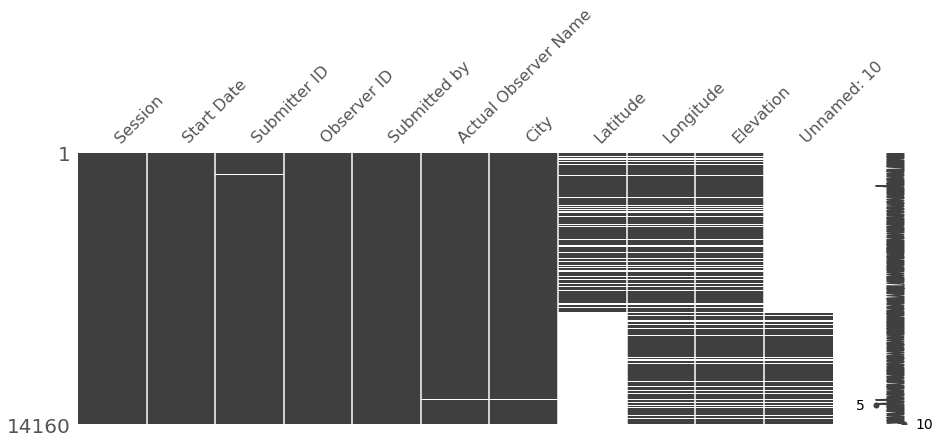

In [203]:
msno.matrix(df,figsize=(15,5))
plt.show()

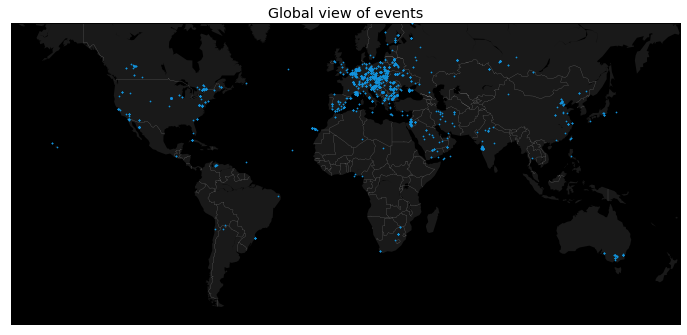

In [204]:
# Set up plot
df_events_sample = df.sample(n=7000)
plt.figure(1, figsize=(12,6))

# Mercator of World
m1 = Basemap(projection='merc',
             llcrnrlat=-60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')

m1.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000')                # black background
m1.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

# Plot the data
mxy = m1(df_events_sample["Longitude"].tolist(), df_events_sample["Latitude"].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="#1292db", lw=0, alpha=1, zorder=5)

plt.title("Global view of events")
plt.show()

In [205]:
px.scatter_geo(data_frame = df, lat = 'Latitude', lon = 'Longitude', color = 'City', title = 'metero location and their class')




In [206]:
px.scatter_geo(data_frame = df, lat = 'Latitude', lon = 'Longitude', color = 'Observer ID', title = 'Showers By Date')



In [207]:
df['Latitude'].fillna(47.860000, inplace= True)

In [208]:
df['Longitude'].fillna(25.860000, inplace= True)
df['Elevation'].fillna(0, inplace=True)

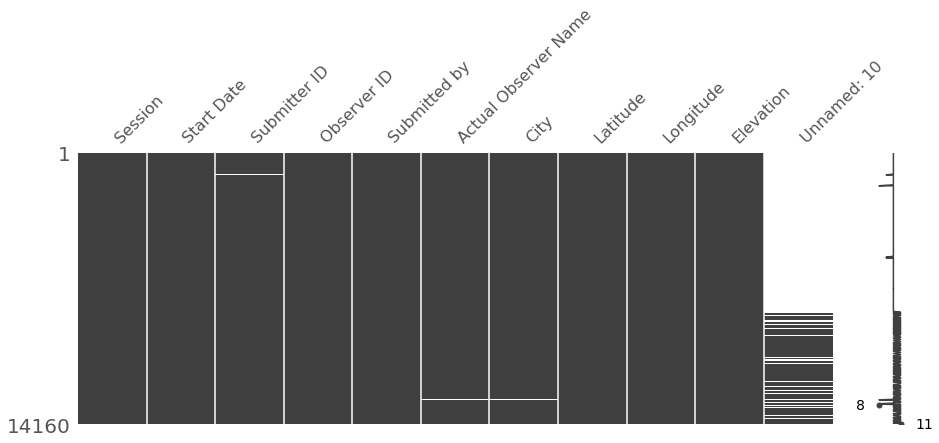

In [209]:
msno.matrix(df,figsize=(15,5))
plt.show()



In [186]:
from prophet import Prophet

In [187]:
df.describe

<bound method NDFrame.describe of        Session          Start Date
0        16011 2006-01-02 18:20:00
1        54240 2006-01-03 01:55:00
2        41834 2006-01-03 05:00:00
3        13239 2006-01-03 10:10:00
4        17531 2006-01-03 13:58:00
...        ...                 ...
14155    82085 2015-12-15 00:50:00
14156    83596 2013-02-10 22:10:00
14157    83597 2013-02-05 19:52:00
14158    83598 2013-02-04 20:35:00
14159    83599 2013-02-02 20:31:00

[14160 rows x 2 columns]>

In [188]:
df['Session'].unique()

array([16011, 54240, 41834, ..., 83597, 83598, 83599])

KeyError: 'Longitude'

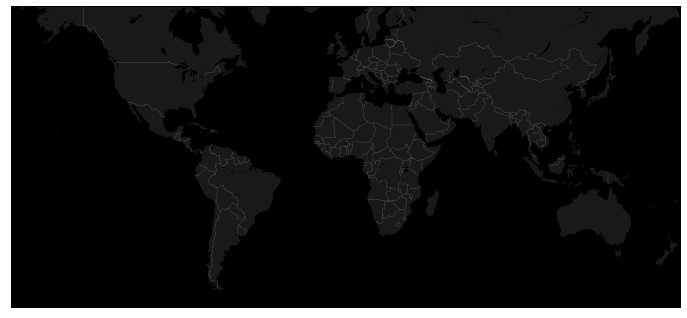

In [189]:
# Set up plot
df_events_sample = df.sample(n=7000)
plt.figure(1, figsize=(12,6))

# Mercator of World
m1 = Basemap(projection='merc',
             llcrnrlat=-60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')

m1.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000')                # black background
m1.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

# Plot the data
mxy = m1(df_events_sample["Longitude"].tolist(), df_events_sample["Latitude"].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="#1292db", lw=0, alpha=1, zorder=5)

plt.title("Global view of events")
plt.show()

In [190]:
df.drop(['Submitter ID' , 'Observer ID','Submitted by','Actual Observer Name','City','Longitude','Elevation'], axis = 1, inplace = True)

df.drop(['Latitude'], axis = 1, inplace = True)







KeyError: "['Submitter ID', 'Observer ID', 'Submitted by', 'Actual Observer Name', 'City', 'Longitude', 'Elevation'] not found in axis"

In [177]:
df

,Session,Start Date,Unnamed: 10
0,16011,2006-01-02 18:20:00,NaN
1,54240,2006-01-03 01:55:00,NaN
2,41834,2006-01-03 05:00:00,NaN
3,13239,2006-01-03 10:10:00,NaN
4,17531,2006-01-03 13:58:00,NaN
...,...,...,...
14155,82085,2015-12-15 00:50:00,1310.0
14156,83596,2013-02-10 22:10:00,55.0
14157,83597,2013-02-05 19:52:00,55.0
14158,83598,2013-02-04 20:35:00,55.0


In [178]:


df.columns = ['y', 'ds']



ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

In [179]:
df['ds'] = pd.to_datetime(df['ds']).dt.date



df



KeyError: 'ds'

In [180]:
df2 = df.groupby(df['ds'])['ds'].count().reset_index(name= 'y')


df2


KeyError: 'ds'

In [181]:
m = Prophet()
model = m.fit(df2)

22:43:00 - cmdstanpy - INFO - Chain [1] start processing
22:43:00 - cmdstanpy - INFO - Chain [1] done processing


In [182]:
future  = m.make_future_dataframe(periods=356, freq = 'D')
forecast = m.predict(future)

In [183]:
forecast.tail


<bound method NDFrame.tail of              ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2006-01-02  5.078919  -10.374212   23.880702     5.078919     5.078919   
1    2006-01-03  5.079828  -12.431778   25.230748     5.079828     5.079828   
2    2006-01-04  5.080738  -11.742666   24.135932     5.080738     5.080738   
3    2006-01-06  5.082556  -12.248462   22.868070     5.082556     5.082556   
4    2006-01-07  5.083465  -12.628721   23.936529     5.083465     5.083465   
...         ...       ...         ...         ...          ...          ...   
1508 2011-11-16  7.221651  -11.086446   25.516365     7.200478     7.240450   
1509 2011-11-17  7.222816  -12.465477   23.439110     7.201681     7.241706   
1510 2011-11-18  7.223981  -12.832443   27.307739     7.202845     7.242940   
1511 2011-11-19  7.225146  -11.353981   25.892380     7.203937     7.244164   
1512 2011-11-20  7.226311  -10.933542   27.203559     7.205029     7.245392   

      additive_terms 

In [143]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2006-01-02,5.996830
1,2006-01-03,6.989496
2,2006-01-04,6.224443
3,2006-01-06,5.552731
4,2006-01-07,5.188220
...,...,...
1508,2011-11-16,6.472187
1509,2011-11-17,6.838828
1510,2011-11-18,7.265574
1511,2011-11-19,7.740479


In [144]:
plt.style.use("ggplot")

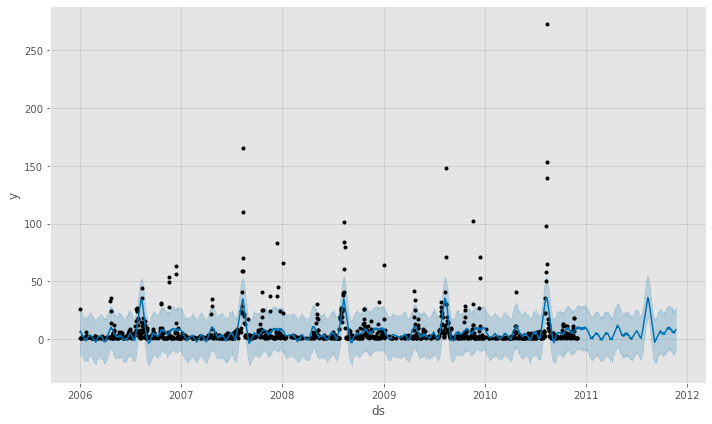

In [145]:
plot1 = m.plot(forecast)

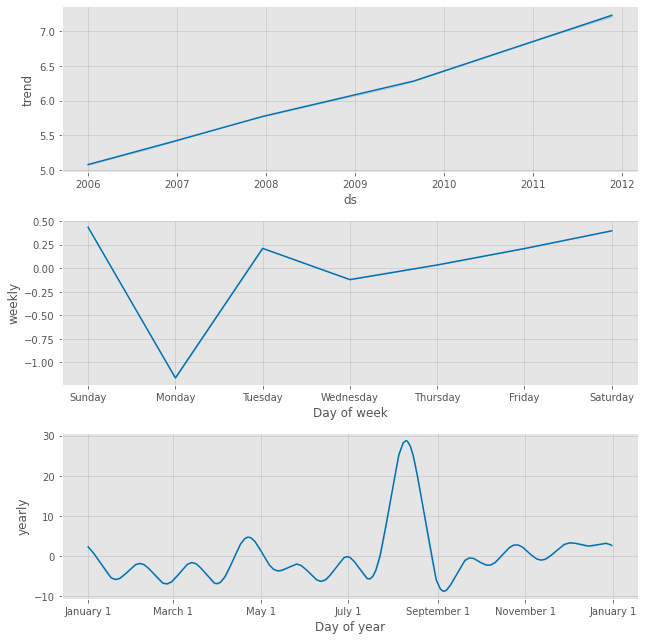

In [146]:
plot2 = m.plot_components(forecast)

In [147]:
from prophet.diagnostics import cross_validation

df_cv = cross_validation(m, initial='1075 days', period='180 days', horizon = '365 days')

df_cv.head()

  0%|          | 0/2 [00:00<?, ?it/s]

22:27:42 - cmdstanpy - INFO - Chain [1] start processing
22:27:42 - cmdstanpy - INFO - Chain [1] done processing
22:27:43 - cmdstanpy - INFO - Chain [1] start processing
22:27:43 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2009-06-13,2.211907,-12.465266,16.783515,3,2009-06-02
1,2009-06-16,1.013241,-13.792412,14.976131,1,2009-06-02
2,2009-06-19,3.315315,-10.658567,18.319697,1,2009-06-02
3,2009-06-20,4.498123,-10.085090,18.964649,1,2009-06-02
4,2009-06-21,5.109238,-9.001255,19.729498,2,2009-06-02


In [148]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,46 days,162.986492,12.766616,6.344383,2.436007,1.284537,0.971090,0.931818
1,47 days,160.085805,12.652502,6.053830,2.080444,1.016703,0.919953,0.931818
2,48 days,159.747212,12.639114,6.015875,2.032040,0.938365,0.909942,0.931818
3,49 days,158.099093,12.573746,5.827103,1.828939,0.892750,0.875129,0.931818
4,50 days,157.933508,12.567160,5.785401,1.813662,0.892750,0.864868,0.931818


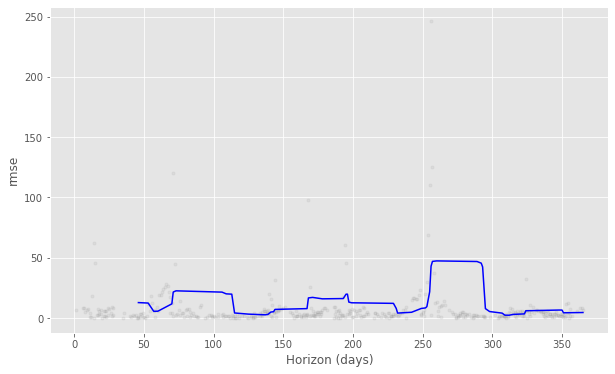

In [152]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')
